In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import numpy as np
import cv2
import os
import glob
from PIL import Image, ImageOps 


In [2]:
## Code to read a colored image and convert to grayscale

X=[]
 
folder= "/Users/praanshu/Desktop/FaceRecognition_Data/ALL/"

for img_path in os.listdir(folder):
    
    if img_path.endswith('.TIF'):
        img = Image.open(folder+img_path)
        img_gr = ImageOps.grayscale(img)
        image_flat= np.array(img_gr)
        image_flat= image_flat.flatten(order ='F')  #converting into a vectorised image 
        image_flat = image_flat.tolist()
        X.append(image_flat)   #Storing all the vectorized images into an array
    
    
X= np.matrix(X).transpose()


In [3]:
row,col = X.shape
mean_vector=[]
for i in range(0,row):
    meanX = np.mean(X[i,:])
    mean_vector.append(meanX)
    
mean_vector= np.matrix(mean_vector).transpose()  #Finding the mean face image from all the images

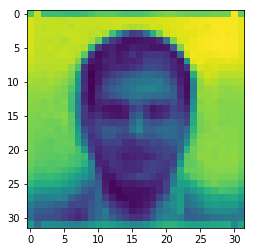

In [4]:
## Displaying average image

Avg_img= mean_vector.reshape(32,32)
Avg_img_final= cv2.rotate(Avg_img, cv2.ROTATE_90_CLOCKWISE)
plt.imshow(Avg_img_final)

In [5]:
##Finding mean difference and creating covariance matrix in order to find eigenvalues later

repeat_mean_vec= np.kron(np.ones((1,35)), mean_vector)
A= X-repeat_mean_vec
Cov_matrix = np.dot(A,A.T)
Cov_matrix= np.array(Cov_matrix)

In [6]:
## Finding eigenvalues and sorting eig vectors in decreasing order of eig values
eigenValues, eigenVectors = np.linalg.eig(Cov_matrix)

idx = np.argsort(-eigenValues)  
sorted_eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]
final_eig_vector =  eigenVectors[:,0:10]

In [7]:
##Constructing database and finding eigenfaces for the training set

DB_train = []
length_db =0
train_image_names=[]
folder2= "/Users/praanshu/Desktop/FaceRecognition_Data/FA/"

for img_path in os.listdir(folder2):
    
    if img_path.endswith('.TIF'):
        img_db = Image.open(folder2+img_path)
        train_image_names.append(img_path)
        img_gr_db = ImageOps.grayscale(img_db)
        length_db= length_db + 1
        image_flat_db= np.array(img_gr_db).flatten(order ='F').tolist()
        DB_train.append(image_flat_db)


    
DB_train= np.matrix(DB_train).transpose()
y = (DB_train) - repeat_mean_vec[:,0:length_db]
eigenfaces = (final_eig_vector.transpose()) * y


In [8]:
#Constructing database for test set, and finding eigenfaces for the test set

FB_test = []
length_test =0
test_image_names=[]
 
folder3= "/Users/praanshu/Desktop/FaceRecognition_Data/FB/"
for img_path in os.listdir(folder3):
    if img_path.endswith('.TIF'):
        length_test= length_test + 1
        test_image_names.append(img_path)
        img_test = Image.open(folder3+img_path)
        img_gr_test = ImageOps.grayscale(img_test)
        image_flat_test= np.array(img_gr_test).flatten(order ='F').tolist()
        FB_test.append(image_flat_test)
        
    
    
FB_test= np.array(FB_test).transpose()

yz = (FB_test) - repeat_mean_vec[:,0:length_test]
fb_yz = (final_eig_vector.transpose()) * yz


In [9]:
## Classifying images using minimum Euclidean distance

min_dist_idx = []

for i in range(length_test):
    euclidean_dist_array = []
    
    
    ## For each image, calculate Euclidean dist with 12 train images
    for j in range(length_db):
        
        euclidean_dist = np.sqrt(np.sum(np.power((fb_yz[:, i] - eigenfaces[:, j]),2)))
        
        euclidean_dist_array.append(euclidean_dist)
        
        
    min_euclidean_dist = min(euclidean_dist_array)
        
    ##Get index of the min-distance image
    if (euclidean_dist_array == min_euclidean_dist).any():
        min_dist_idx.append(euclidean_dist_array.index(min_euclidean_dist)) 
        
min_dist_idx= np.array(min_dist_idx).transpose()


In [11]:
## Checking accuracy

flag = 0;


for k in range(23):
    if (test_image_names[k][0:11] == train_image_names[min_dist_idx[k]][0:11]):
        flag = flag+1

        
Accuracy = (flag/length_test) * 100;
print(Accuracy)     


73.91304347826086
